# Preparação

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests
import io

In [ ]:
# cria 'path'
url = 'raw.githubusercontent.com'
username = 'brunoFNIR'
repository = 'Mortes-decorrentes-de-intervencao-policial-2013_nov2024'
file_name = 'MDIP_2024.xlsx'
path = f'https://{url}/{username}/{repository}/main/{file_name}'


In [ ]:
# carrega base de dados
response = requests.get(path)
response.raise_for_status()

with io.BytesIO(response.content) as file_like:
    with open('MDIP_2024.xlsx', 'wb') as file:
        file.write(file_like.getbuffer())

In [ ]:
# cria data frame
df = pd.read_excel('MDIP_2024.xlsx', header=(0))

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


# Limpeza de Dados

In [ ]:
pd.set_option('display.max_columns', None)
print('Número de Linhas e Colunas: ', df.shape)
df.head(5)

Número de Linhas e Colunas:  (8833, 30)


,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,COORPORAÇÃO,SITUAÇÃO,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,SEC_ELABORACAO,DEP_ELABORACAO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA
0,DECAP,DEL.SEC.2º SUL,S.PAULO,27º DP DR. IGNÁCIO FRANCISCO,PM,Folga,200100,1,2013,2013-01-24 00:00:00,69,2013,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2013-01-24 00:00:00,04:15:00,Comércio e serviços,AV DOS BANDEIRANTES,5599,-23.626291,-46.648954,Vítima,Masculino,NaN,NaN,Branca,NaN,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL
1,DECAP,DEL.SEC.2º SUL,S.PAULO,27º DP DR. IGNÁCIO FRANCISCO,PM,Serviço,200100,1,2013,2013-01-07 00:00:00,21,2013,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2013-01-06 00:00:00,22:45:00,Via pública,R PRINCESA ISABEL,730,-23.619455,-46.680163,Autor/Vítima,Masculino,17,1995-12-27 00:00:00,Parda,ESTUDANTE,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL
2,DECAP,DEL.SEC.2º SUL,S.PAULO,27º DP DR. IGNÁCIO FRANCISCO,PM,Serviço,200100,1,2013,2013-01-07 00:00:00,21,2013,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2013-01-07 00:00:00,22:45:00,Via pública,R PRINCESA ISABEL,730,0,0,Autor/Vítima,Masculino,20,1992-07-02 00:00:00,Parda,ENTREGADOR(A),MORTE DECORRENTE DE INTERVENÇÃO POLICIAL
3,DECAP,DEL.SEC.2º SUL,S.PAULO,95º D.P. HELIÓPOLIS,PC,Folga,200100,1,2013,NaN,34,2013,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2013-01-11 00:00:00,17:30:00,Via pública,R CEL FRANCISCO INACIO,NÃO INFORMADO,-46.602079,0,Adolescente infrator,Masculino,17,1995-01-23 00:00:00,Parda,NaN,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL
4,DECAP,DEL.SEC.3º OESTE,S.PAULO,14º D.P. PINHEIROS,PC,Folga,200100,1,2013,NaN,31,2013,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2013-01-10 00:00:00,20:45:00,Comércio e serviços,R PAULISTANIA,450,-46.690347,0,Autor/Vítima,Masculino,34,1978-11-29 00:00:00,Branca,VIGILANTE,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL


In [ ]:
# remove registros com 'NaN'
df = df.dropna()

In [ ]:
# retorna True na posição em que há linha duplicada
df.duplicated()

,0
1,False
2,False
6,False
14,False
15,False
...,...
8784,False
8802,False
8808,False
8814,False


In [ ]:
print('Número de Linhas e Colunas: ', df.shape)
df.head(5)

Número de Linhas e Colunas:  (2331, 30)


,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,COORPORAÇÃO,SITUAÇÃO,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,SEC_ELABORACAO,DEP_ELABORACAO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA
1,DECAP,DEL.SEC.2º SUL,S.PAULO,27º DP DR. IGNÁCIO FRANCISCO,PM,Serviço,200100,1,2013,2013-01-07 00:00:00,21,2013,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2013-01-06 00:00:00,22:45:00,Via pública,R PRINCESA ISABEL,730,-23.619455,-46.680163,Autor/Vítima,Masculino,17,1995-12-27 00:00:00,Parda,ESTUDANTE,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL
2,DECAP,DEL.SEC.2º SUL,S.PAULO,27º DP DR. IGNÁCIO FRANCISCO,PM,Serviço,200100,1,2013,2013-01-07 00:00:00,21,2013,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2013-01-07 00:00:00,22:45:00,Via pública,R PRINCESA ISABEL,730,0,0,Autor/Vítima,Masculino,20,1992-07-02 00:00:00,Parda,ENTREGADOR(A),MORTE DECORRENTE DE INTERVENÇÃO POLICIAL
6,DECAP,DEL.SEC.3º OESTE,S.PAULO,51º D.P. RIO PEQUENO,PM,Serviço,200100,1,2013,2013-01-05 00:00:00,17,2013,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2013-01-04 00:00:00,00:15:00,Via pública,AV MAL FIUZA DE CASTRO,260,-23.583077,-46.745057,Autor/Vítima,Masculino,28,1984-11-12 00:00:00,Parda,MOTO-BOY,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL
14,DECAP,DEL.SEC.7º ITAQUERA,S.PAULO,50º D.P. ITAIM PAULISTA,PM,Folga,200100,1,2013,2013-01-04 00:00:00,13,2013,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2013-01-04 00:00:00,06:40:00,Via pública,AV MAL TITO,6423,-23.490965,-46.386496,Autor,Masculino,21,1991-10-03 00:00:00,Parda,ERENILSON DANTAS DA SILVA,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL
15,DECAP,DEL.SEC.7º ITAQUERA,S.PAULO,50º D.P. ITAIM PAULISTA,PM,Folga,200100,1,2013,2013-01-29 00:00:00,85,2013,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2013-01-29 00:00:00,10:40:00,Via pública,R MANUEL VIEIRA DANTAS,53,-23.507213,-46.383644,Autor/Vítima,Masculino,25,1987-11-04 00:00:00,Parda,AJUDANTE,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2331 entries, 1 to 8830
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   DEPARTAMENTO_CIRCUNSCRICAO  2331 non-null   object
 1   SECCIONAL_CIRCUNSCRICAO     2331 non-null   object
 2   MUNICIPIO_CIRCUNSCRICAO     2331 non-null   object
 3   DP_CIRCUNSCRICAO            2331 non-null   object
 4   COORPORAÇÃO                 2331 non-null   object
 5   SITUAÇÃO                    2331 non-null   object
 6   ID_DELEGACIA                2331 non-null   object
 7   MÊS ESTATISTICA             2331 non-null   int64 
 8   ANO ESTATISTICA             2331 non-null   int64 
 9   DATAHORA_REGISTRO_BO        2331 non-null   object
 10  NUM_BO                      2331 non-null   object
 11  ANO_BO                      2331 non-null   int64 
 12  MUNICIPIO_ELABORACAO        2331 non-null   object
 13  DP_ELABORACAO               2331 non-null   object
 1

In [ ]:
# deleta colunas 'NATUREZA_APURADA', pois sao todos valores iguais
df = df.drop('NATUREZA_APURADA', axis=1)

In [ ]:
# altera dados categoricas para 'upper case'
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype(str).str.upper()

In [ ]:
for col in df.columns:
  # Verifica se a coluna é do tipo 'object' e se tem 10 ou menos valores únicos
  if df[col].dtype == 'object' and df[col].nunique() <= 10 :
    print(f"Valores únicos na coluna '{col}':")
    print(df[col].unique())
    print("-" * 30) # Adiciona uma linha separadora para melhor visualização

Valores únicos na coluna 'COORPORAÇÃO':
['PM' 'PC']
------------------------------
Valores únicos na coluna 'SITUAÇÃO':
['SERVIÇO' 'FOLGA']
------------------------------
Valores únicos na coluna 'SEXO_PESSOA':
['MASCULINO' 'FEMININO' 'REGISTRADO NA PF']
------------------------------
Valores únicos na coluna 'COR_PELE':
['PARDA' 'BRANCA' 'PRETA' 'AMARELA' 'REGISTRADO NA PF' 'IGNORADA'
 'POLICIA FEDERAL']
------------------------------


In [ ]:
# remove dados 'sem nexo' nas colunas
df = df[df['SEXO_PESSOA'] != 'REGISTRADO NA PF']
df = df[df['COR_PELE'] != 'REGISTRADO NA PF']
df = df[df['COR_PELE'] != 'POLICIA FEDERAL']
df = df[df['DATAHORA_REGISTRO_BO'] != 'CRIME MILITAR']
df = df[df['DATAHORA_REGISTRO_BO'] != 'REGISTRADO NA PF']

In [ ]:
# verifica consistencia dos dados na coluna 'DATAHORA_REGISTRO_BO'
for linha in df['DATAHORA_REGISTRO_BO']:
  if linha[11:19] != '00:00:00':
    print(linha)

2020-02-29 01:26:05
2020-02-29 01:26:05
2020-05-01 02:58:00
2020-04-27 01:35:00
2020-04-22 09:34:00
2020-04-23 08:11:00
2020-05-22 18:40:00
2020-06-30 21:11:00
2020-07-22 01:14:00
2020-07-03 11:09:00
2020-07-04 14:33:00
2020-07-31 23:33:00
2020-07-02 02:28:00
2020-07-25 22:10:00
2020-07-31 14:23:00
2020-07-02 01:16:00
2020-07-04 00:50:00
2020-07-11 20:53:00
2020-07-21 20:31:00
2020-07-18 06:59:00
2020-07-07 05:40:00
2020-07-04 14:32:00
2020-07-02 09:21:00
2020-07-16 09:41:00
2020-07-25 19:55:00
2020-08-24 23:23:00
2020-08-06 21:50:00
2020-08-07 03:39:00
2020-08-08 09:38:00
2020-08-14 01:25:00
2020-08-01 23:42:00
2020-08-22 14:19:00
2020-08-16 10:44:00
2020-08-09 21:57:00
2020-08-16 16:50:00
2020-08-08 06:15:00
2020-08-19 00:43:00
2020-08-18 13:21:00
2020-08-18 23:40:00
2020-08-29 01:48:00
2020-08-29 22:37:00
2020-08-23 07:41:22
2020-08-04 00:21:00
2020-08-22 11:30:00
2020-09-29 22:53:34
2020-10-06 18:34:00
2020-10-02 22:26:00
2020-11-03 11:05:00
2021-01-17 17:23:00
2021-01-12 02:59:00


In [ ]:
# remove parte dos registros referentes a hora da coluna 'DATAHORA_REGISTRO_BO', devido incosistência nesses dados
for linha in df['DATAHORA_REGISTRO_BO']:
  df['DATAHORA_REGISTRO_BO'] = df['DATAHORA_REGISTRO_BO'].str.replace('00:00:00', '')

In [ ]:
# renomeia coluna 'DATAHORA_REGISTRO_BO' para 'DATA_REGISTRO_BO'
df.rename(columns={'DATAHORA_REGISTRO_BO': 'DATA_RESGISTRO_BO'}, inplace=True)

In [ ]:
df.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,COORPORAÇÃO,SITUAÇÃO,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATA_RESGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,SEC_ELABORACAO,DEP_ELABORACAO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO
1,DECAP,DEL.SEC.2º SUL,S.PAULO,27º DP DR. IGNÁCIO FRANCISCO,PM,SERVIÇO,200100,1,2013,2013-01-07,21,2013,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2013-01-06 00:00:00,22:45:00,VIA PÚBLICA,R PRINCESA ISABEL,730,-23.6194548088362,-46.680162940918,AUTOR/VÍTIMA,MASCULINO,17,1995-12-27 00:00:00,PARDA,ESTUDANTE
2,DECAP,DEL.SEC.2º SUL,S.PAULO,27º DP DR. IGNÁCIO FRANCISCO,PM,SERVIÇO,200100,1,2013,2013-01-07,21,2013,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2013-01-07 00:00:00,22:45:00,VIA PÚBLICA,R PRINCESA ISABEL,730,0,0,AUTOR/VÍTIMA,MASCULINO,20,1992-07-02 00:00:00,PARDA,ENTREGADOR(A)
6,DECAP,DEL.SEC.3º OESTE,S.PAULO,51º D.P. RIO PEQUENO,PM,SERVIÇO,200100,1,2013,2013-01-05,17,2013,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2013-01-04 00:00:00,00:15:00,VIA PÚBLICA,AV MAL FIUZA DE CASTRO,260,-23.5830771378725,-46.7450574281571,AUTOR/VÍTIMA,MASCULINO,28,1984-11-12 00:00:00,PARDA,MOTO-BOY
14,DECAP,DEL.SEC.7º ITAQUERA,S.PAULO,50º D.P. ITAIM PAULISTA,PM,FOLGA,200100,1,2013,2013-01-04,13,2013,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2013-01-04 00:00:00,06:40:00,VIA PÚBLICA,AV MAL TITO,6423,-23.4909646905751,-46.3864964202875,AUTOR,MASCULINO,21,1991-10-03 00:00:00,PARDA,ERENILSON DANTAS DA SILVA
15,DECAP,DEL.SEC.7º ITAQUERA,S.PAULO,50º D.P. ITAIM PAULISTA,PM,FOLGA,200100,1,2013,2013-01-29,85,2013,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2013-01-29 00:00:00,10:40:00,VIA PÚBLICA,R MANUEL VIEIRA DANTAS,53,-23.5072128165188,-46.3836440016977,AUTOR/VÍTIMA,MASCULINO,25,1987-11-04 00:00:00,PARDA,AJUDANTE


In [ ]:
# verifica presenaça de valores 0 ou 0.0 para Latitude e Longitude
print("\nContagem de valores '0' ou '0.0' em Latitude e Longitude:")
print(f"Latitude zeros: {(df['LATITUDE'] == '0').sum() + (df['LATITUDE'] == '0.0').sum()}")
print(f"Longitude zeros: {(df['LONGITUDE'] == '0').sum() + (df['LONGITUDE'] == '0.0').sum()}")


Contagem de valores '0' ou '0.0' em Latitude e Longitude:
Latitude zeros: 142
Longitude zeros: 142


In [ ]:
# converte Latitude e Longitude para numérico, tratando erros
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

# remove linhas onde Latitude ou Longitude são NaN ou zero
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
df = df[(df['LATITUDE'] != 0) | (df['LONGITUDE'] != 0)]

print(f"Número de linhas após remover valores inválidos de Latitude/Longitude: {df.shape[0]}")
display(df[['LATITUDE', 'LONGITUDE']].head())

Número de linhas após remover valores inválidos de Latitude/Longitude: 2182


,LATITUDE,LONGITUDE
1,-23.619455,-46.680163
6,-23.583077,-46.745057
14,-23.490965,-46.386496
15,-23.507213,-46.383644
16,-23.523281,-46.423710


### Visualização das distribuições das seguintes variáveis categóricas:

####  **'COORPORAÇÃO', 'SITUAÇÃO', 'SEXO_PESSOA', 'COR_PELE'**

/tmp/ipython-input-20-3717296207.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='COORPORAÇÃO', order=df['COORPORAÇÃO'].value_counts().index, palette='viridis')


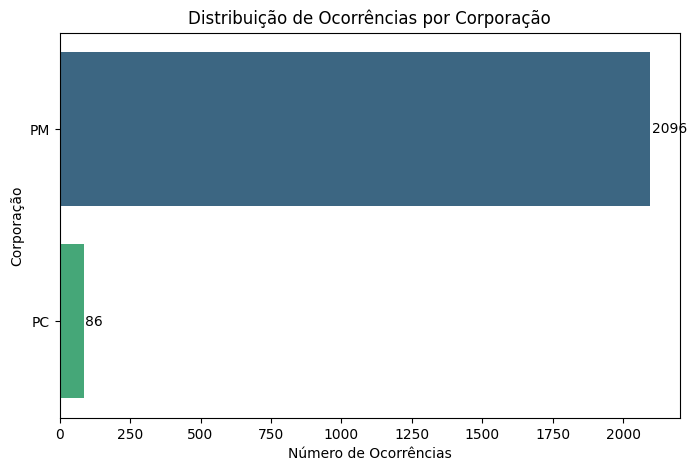

/tmp/ipython-input-20-3717296207.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='SITUAÇÃO', order=df['SITUAÇÃO'].value_counts().index, palette='viridis')


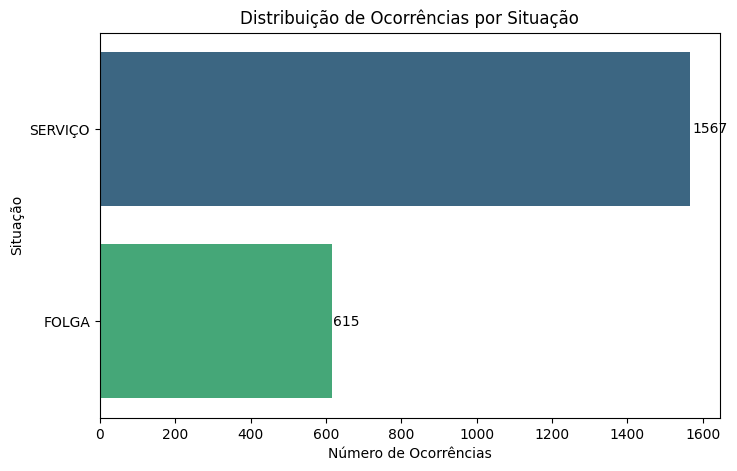

/tmp/ipython-input-20-3717296207.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='SEXO_PESSOA', order=df['SEXO_PESSOA'].value_counts().index, palette='viridis')


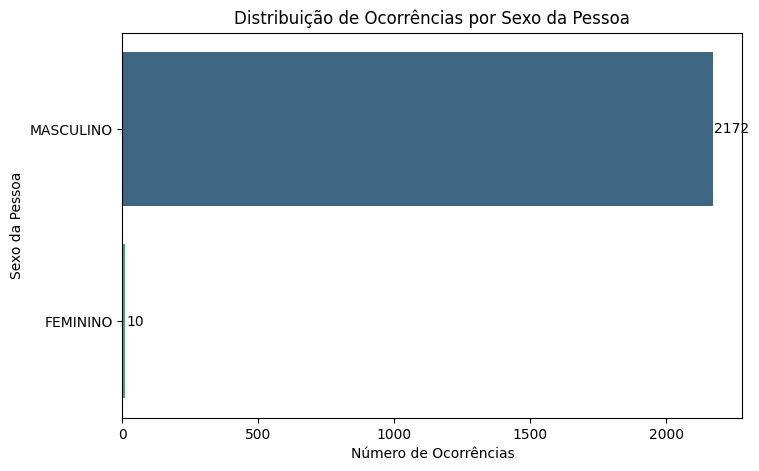

/tmp/ipython-input-20-3717296207.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='COR_PELE', order=df['COR_PELE'].value_counts().index, palette='viridis')


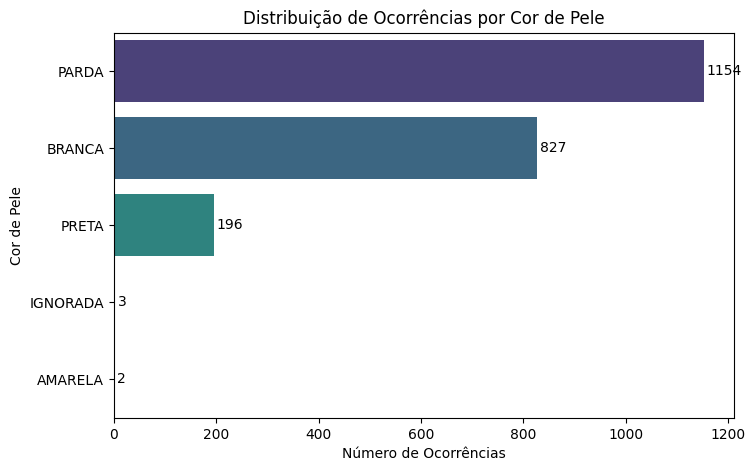

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição por Corporação
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, y='COORPORAÇÃO', order=df['COORPORAÇÃO'].value_counts().index, palette='viridis')
plt.title('Distribuição de Ocorrências por Corporação')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Corporação')
# Adiciona valores nas barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height()/2.,
             '{:1.0f}'.format(width),
             ha='left', va='center')
plt.show()

# Distribuição por Situação
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, y='SITUAÇÃO', order=df['SITUAÇÃO'].value_counts().index, palette='viridis')
plt.title('Distribuição de Ocorrências por Situação')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Situação')
# Adiciona valores nas barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height()/2.,
             '{:1.0f}'.format(width),
             ha='left', va='center')
plt.show()

# Distribuição por Sexo da Pessoa
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, y='SEXO_PESSOA', order=df['SEXO_PESSOA'].value_counts().index, palette='viridis')
plt.title('Distribuição de Ocorrências por Sexo da Pessoa')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Sexo da Pessoa')
# Adiciona valores nas barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height()/2.,
             '{:1.0f}'.format(width),
             ha='left', va='center')
plt.show()

# Distribuição por Cor de Pele
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, y='COR_PELE', order=df['COR_PELE'].value_counts().index, palette='viridis')
plt.title('Distribuição de Ocorrências por Cor de Pele')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Cor de Pele')
# Adiciona valores nas barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height()/2.,
             '{:1.0f}'.format(width),
             ha='left', va='center')
plt.show()

### Análise da distribuição da variável numérica:

#### **'IDADE'**

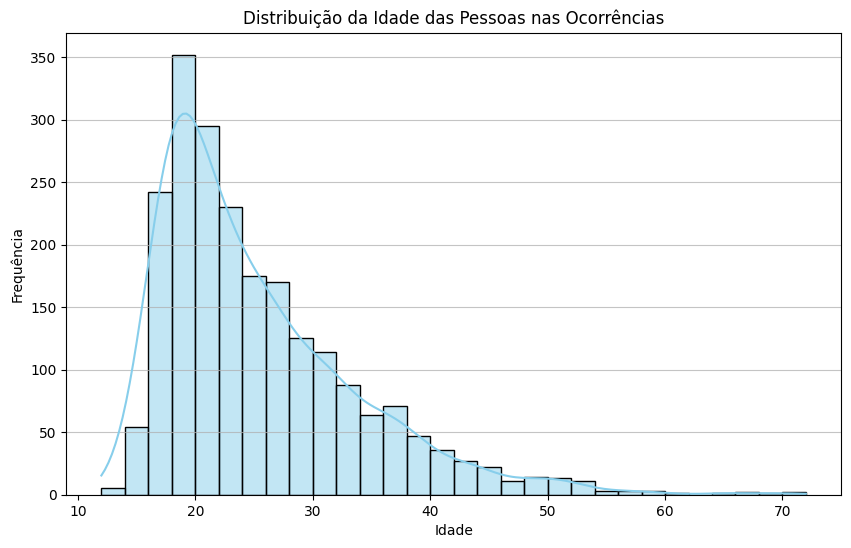

In [ ]:
# Converte a coluna IDADE_PESSOA para numérica, tratando erros
df['IDADE_PESSOA'] = pd.to_numeric(df['IDADE_PESSOA'], errors='coerce')

# Remove linhas onde a conversão de idade falhou (NaN) para a análise de distribuição
df_idade_valida = df.dropna(subset=['IDADE_PESSOA']).copy()

# Distribuição da Idade das Pessoas
plt.figure(figsize=(10, 6))
sns.histplot(data=df_idade_valida, x='IDADE_PESSOA', bins=30, kde=True, color='skyblue')
plt.title('Distribuição da Idade das Pessoas nas Ocorrências')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Análise Temporal

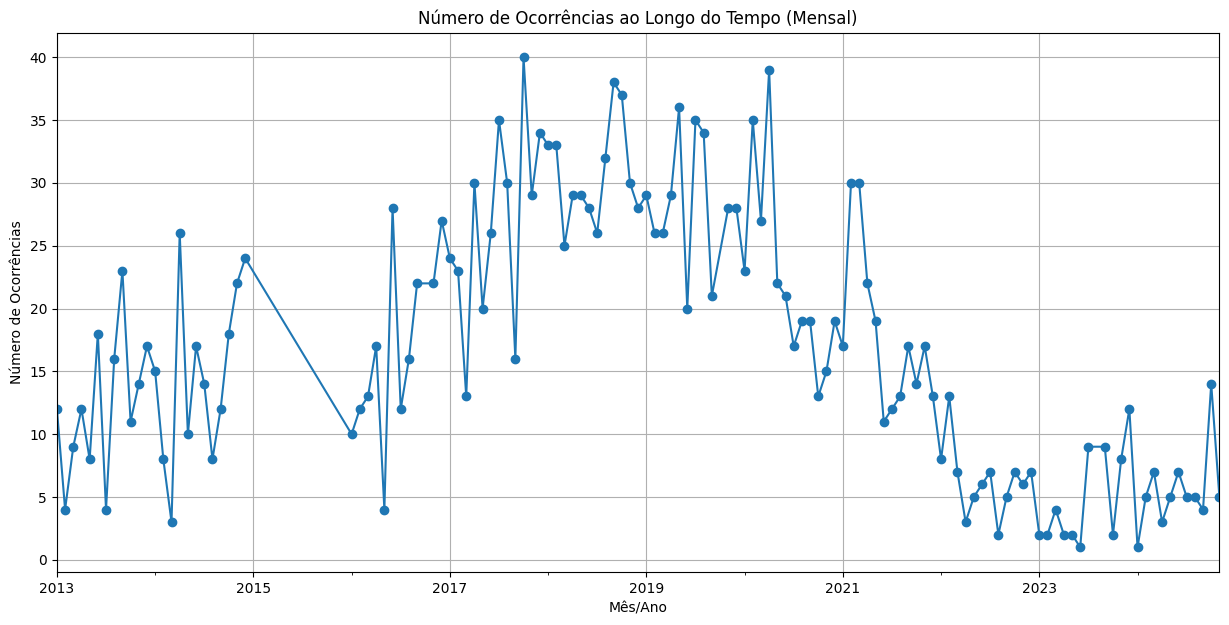

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Converte a coluna 'DATA_FATO' para o tipo datetime
df['DATA_FATO'] = pd.to_datetime(df['DATA_FATO'])

# Extrai o ano e o mês da coluna 'DATA_FATO'
df['ANO_MES'] = df['DATA_FATO'].dt.to_period('M')

# Conta o número de ocorrências por mês/ano
ocorrencias_por_mes = df['ANO_MES'].value_counts().sort_index()

# Visualização da série temporal do número de ocorrências ao longo do tempo
plt.figure(figsize=(15, 7))
ocorrencias_por_mes.plot(kind='line', marker='o')
plt.title('Número de Ocorrências ao Longo do Tempo (Mensal)')
plt.xlabel('Mês/Ano')
plt.ylabel('Número de Ocorrências')
plt.grid(True)
plt.show()

### Análise Geográfica (Scatter Plot)

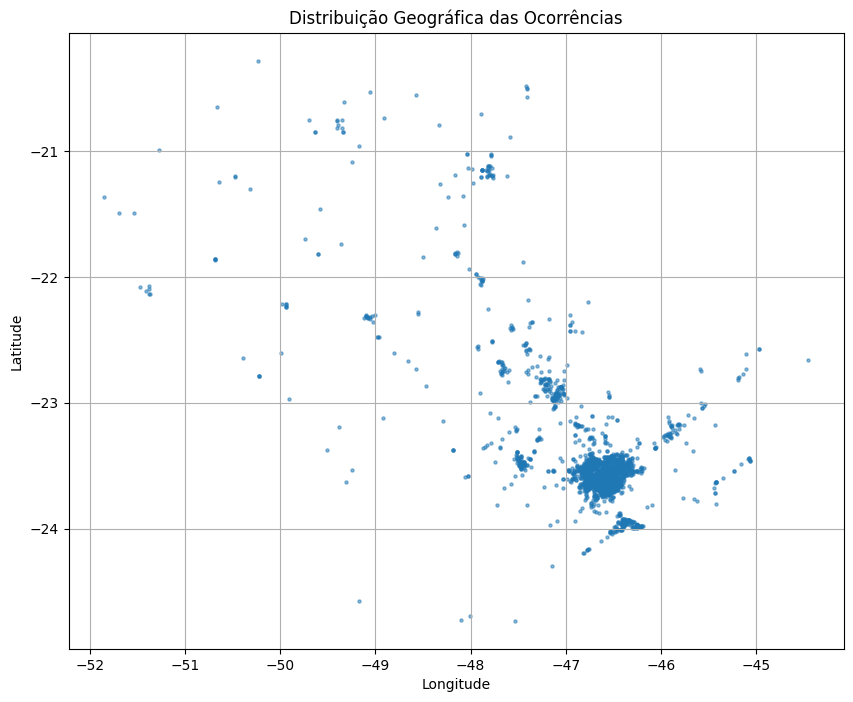

In [ ]:
# Visualizar a distribuição geográfica usando um scatter plot simples
plt.figure(figsize=(10, 8))
plt.scatter(df['LONGITUDE'], df['LATITUDE'], alpha=0.5, s=5) # s é o tamanho do ponto
plt.title('Distribuição Geográfica das Ocorrências')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Análise Temporal por localidade



In [ ]:
df['MUNICIPIO_ELABORACAO'].value_counts()

,count
MUNICIPIO_ELABORACAO,
S.PAULO,851
OSASCO,75
GUARULHOS,73
CAMPINAS,72
S.BERNARDO DO CAMPO,65
...,...
PIEDADE,1
PARAIBUNA,1
VARGEM GRANDE PAULISTA,1


In [ ]:
# cria duas listas: uma para top 5 municipios e outra para seus respectivos valores
top_5_municipios = df['MUNICIPIO_ELABORACAO'].value_counts().head(5).index.tolist()
valores = df['MUNICIPIO_ELABORACAO'].value_counts().head(5).tolist()

print("Top 5 Municípios com mais ocorrências:")
print(top_5_municipios)
print("Valores correspondentes:")
print(valores)

Top 5 Municípios com mais ocorrências:
['S.PAULO', 'OSASCO', 'GUARULHOS', 'CAMPINAS', 'S.BERNARDO DO CAMPO']
Valores correspondentes:
[851, 75, 73, 72, 65]


In [ ]:
# cria um dict atraves das listas
numero_de_mortes_por_localidade = dict(zip(top_5_municipios, valores))

print(numero_de_mortes_por_localidade)

{'S.PAULO': 851, 'OSASCO': 75, 'GUARULHOS': 73, 'CAMPINAS': 72, 'S.BERNARDO DO CAMPO': 65}


/tmp/ipython-input-27-3376037325.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MUNICIPIO',


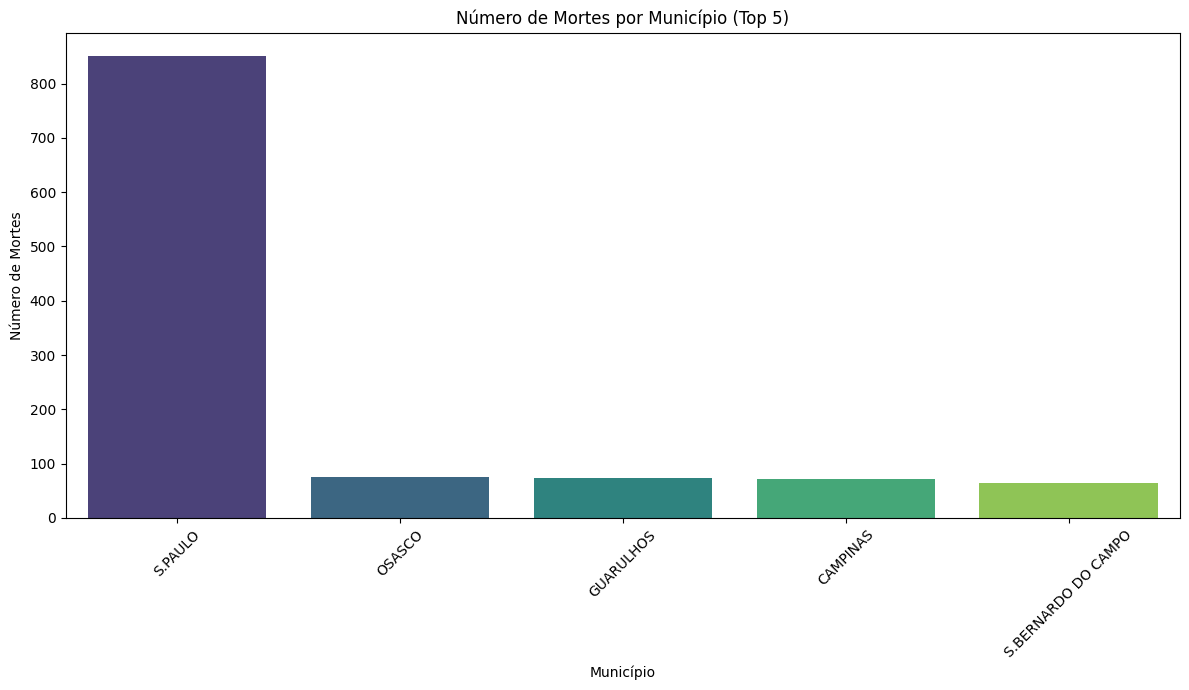

In [ ]:
df_numero_de_mortes_por_localidade = pd.DataFrame(list(numero_de_mortes_por_localidade.items()), columns=['MUNICIPIO', 'NUMERO_DE_MORTES'])

plt.figure(figsize=(12, 7))
sns.barplot(x='MUNICIPIO',
            y='NUMERO_DE_MORTES',
            data=df_numero_de_mortes_por_localidade,
            palette='viridis')
plt.title('Número de Mortes por Município (Top 5)')
plt.xlabel('Município')
plt.ylabel('Número de Mortes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_mortes_por_municipio_mes = df.groupby(['MUNICIPIO_ELABORACAO', 'ANO_MES']).size().reset_index(name='NUMERO_DE_MORTES')

# Converte 'ANO_MES' de volta para timestamp para o plot
df_mortes_por_municipio_mes['ANO_MES'] = df_mortes_por_municipio_mes['ANO_MES'].dt.to_timestamp()

print("\nDataFrame agregado por Município e Ano/Mês (Contagem de Ocorrências):")
print(df_mortes_por_municipio_mes.head())
print(f"Total de linhas no DataFrame agregado: {len(df_mortes_por_municipio_mes)}")

# Obtem os Top 5 Municípios (baseado na contagem total de mortes no período) ---
top_municipios_geral = df['MUNICIPIO_ELABORACAO'].value_counts().head(5).index.tolist()

print("\nTop 5 Municípios com mais ocorrências de mortes no período total:")
print(top_municipios_geral)

# Filtrar o DataFrame agregado para incluir apenas os Top 5
df_top_5_mortes_temporal = df_mortes_por_municipio_mes[df_mortes_por_municipio_mes['MUNICIPIO_ELABORACAO'].isin(top_municipios_geral)]


DataFrame agregado por Município e Ano/Mês (Contagem de Ocorrências):
  MUNICIPIO_ELABORACAO    ANO_MES  NUMERO_DE_MORTES
0               AGUDOS 2022-01-01                 1
1      ALVARES MACHADO 2017-08-01                 1
2            AMERICANA 2017-10-01                 1
3            AMERICANA 2020-01-01                 1
4            AMERICANA 2020-06-01                 1
Total de linhas no DataFrame agregado: 1161

Top 5 Municípios com mais ocorrências de mortes no período total:
['S.PAULO', 'OSASCO', 'GUARULHOS', 'CAMPINAS', 'S.BERNARDO DO CAMPO']


/tmp/ipython-input-30-2420006845.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


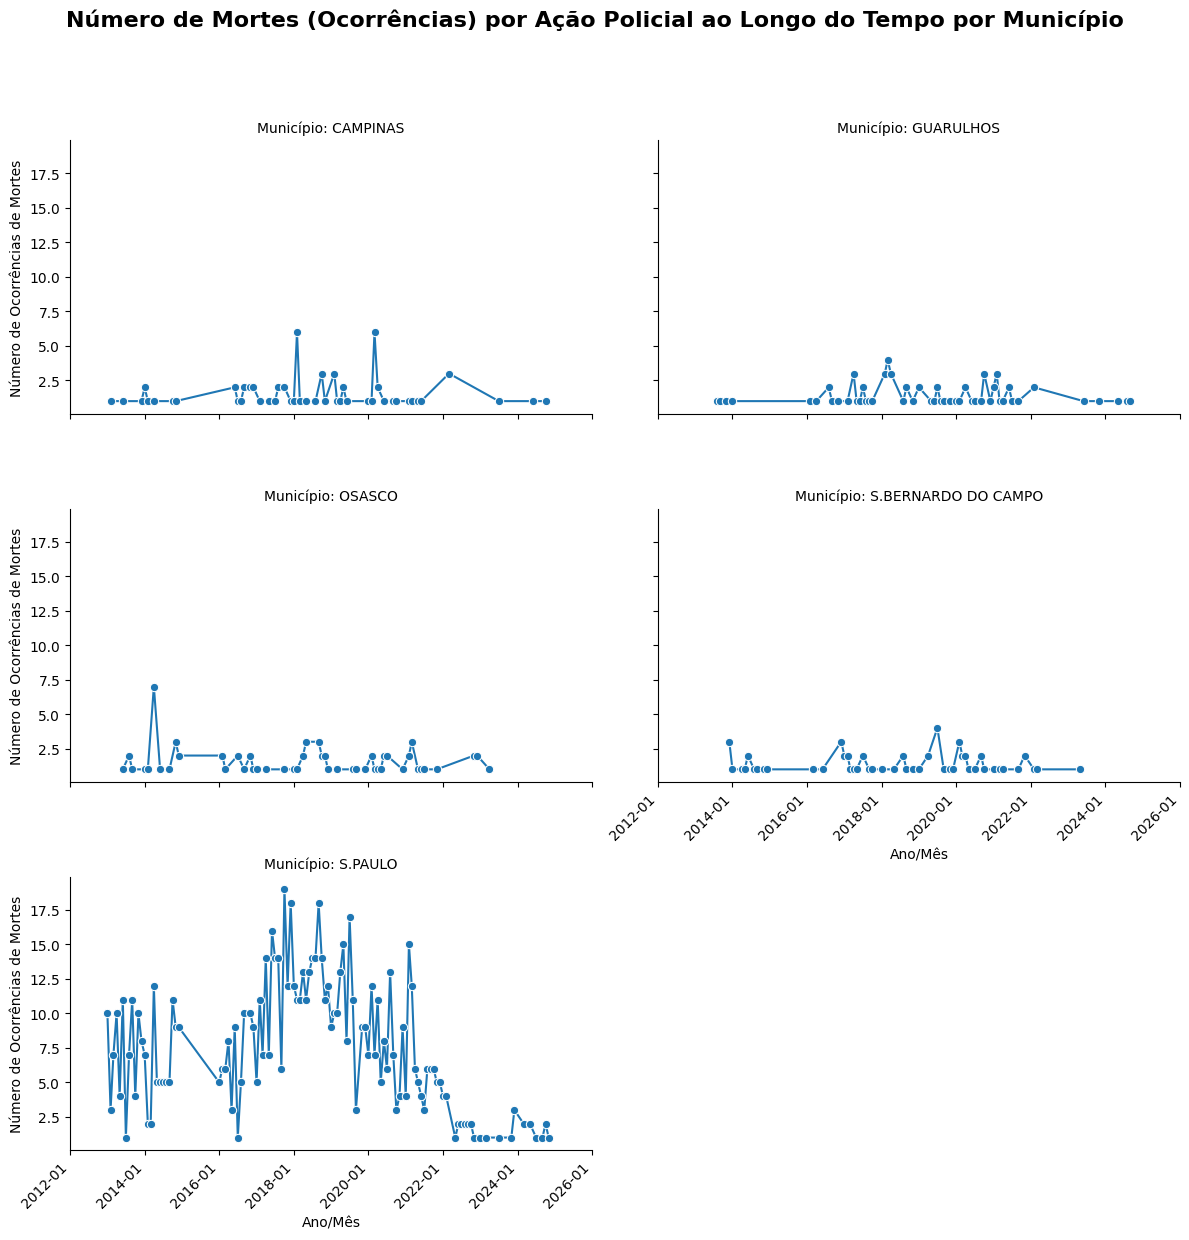

In [ ]:
g = sns.relplot(
    data=df_top_5_mortes_temporal,
    x='ANO_MES',
    y='NUMERO_DE_MORTES',
    col='MUNICIPIO_ELABORACAO',
    col_wrap=2,
    kind='line',
    height=4, aspect=1.5,
    marker='o',
    palette='viridis'
)

g.set_axis_labels("Ano/Mês", "Número de Ocorrências de Mortes") # Ajustei o rótulo do Y
g.set_titles("Município: {col_name}")
g.set_xticklabels(rotation=45, ha='right')
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

g.fig.suptitle('Número de Mortes (Ocorrências) por Ação Policial ao Longo do Tempo por Município', fontsize=16, fontweight='bold', y=1.03)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Gráfico Média Móvel

/tmp/ipython-input-34-4218707627.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


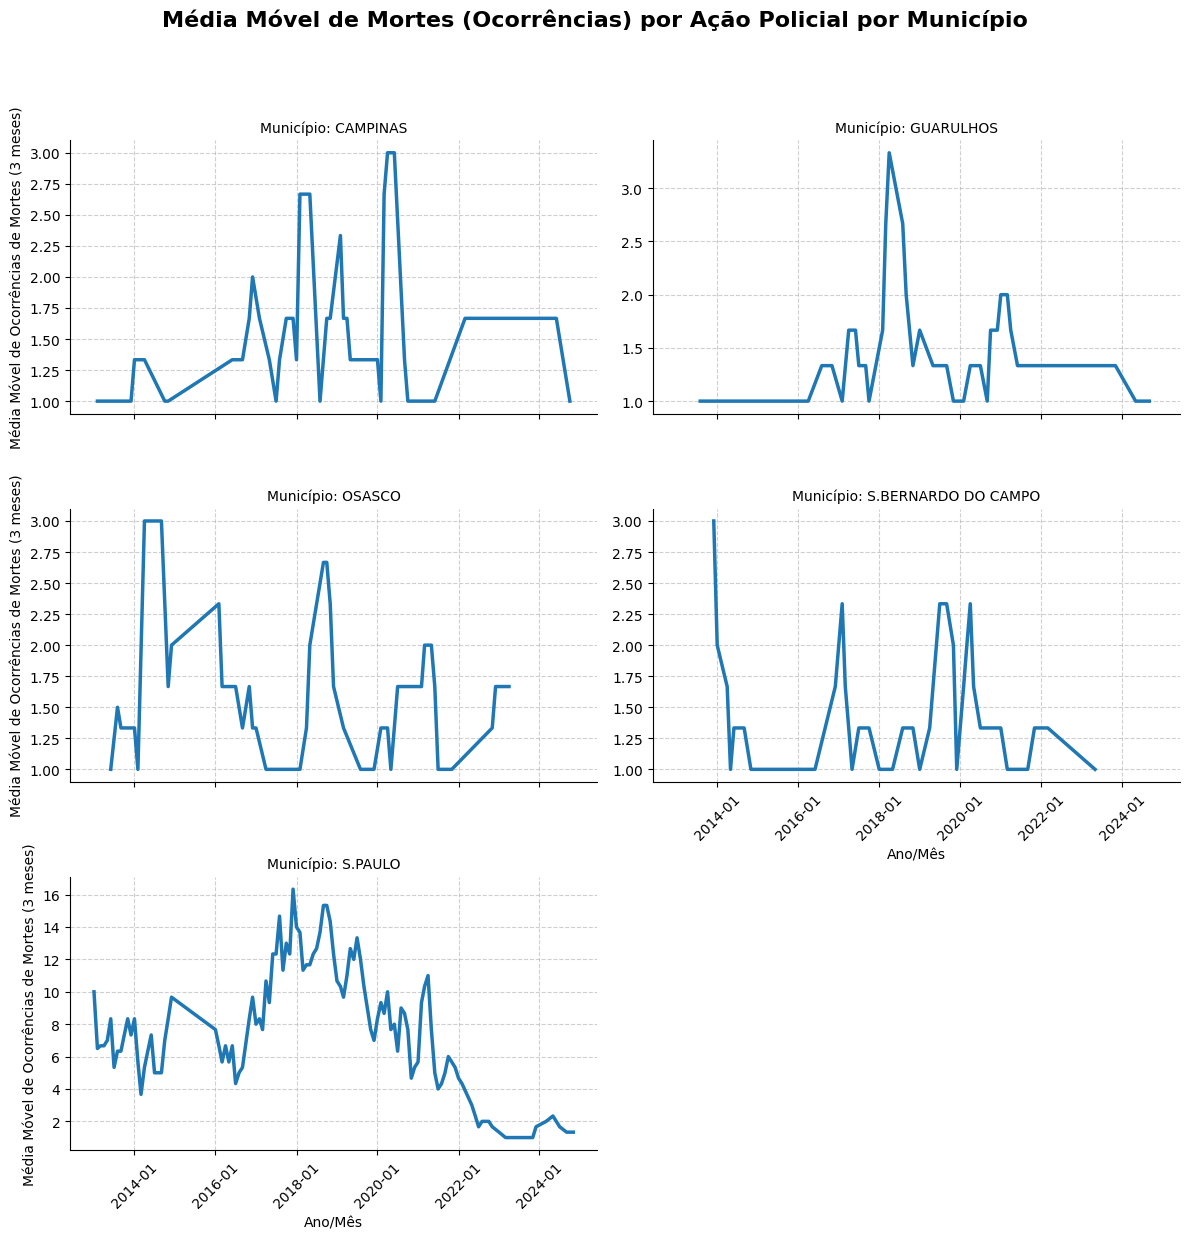

In [ ]:
# --- aplica média móvel (rolling mean) ---
# ordena para garantir que a média móvel seja calculada corretamente ao longo do tempo
df_top_5_mortes_temporal = df_top_5_mortes_temporal.sort_values(by=['MUNICIPIO_ELABORACAO', 'ANO_MES'])

# calcula a média móvel por municipio (3 meses)
df_top_5_mortes_temporal['NUMERO_DE_MORTES_MEDIA_MOVEL'] = df_top_5_mortes_temporal.groupby('MUNICIPIO_ELABORACAO')['NUMERO_DE_MORTES'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# gera gráfico
g = sns.relplot(
    data=df_top_5_mortes_temporal,
    x='ANO_MES',
    y='NUMERO_DE_MORTES_MEDIA_MOVEL', # Usamos os dados suavizados aqui
    col='MUNICIPIO_ELABORACAO',
    col_wrap=2,
    kind='line',
    height=4, aspect=1.5,
    # marker='o', # Removendo marcadores para uma linha mais limpa
    linewidth=2.5, # Linha um pouco mais grossa para destacar a tendência suavizada
    palette='viridis',
    facet_kws={'sharey': False} # Permite que o eixo Y seja ajustado por subplot
)

g.set_axis_labels("Ano/Mês", "Média Móvel de Ocorrências de Mortes (3 meses)")
g.set_titles("Município: {col_name}")
# Iterar sobre os eixos para ajustar formatação individualmente
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6) # Adicionando grade para facilitar a leitura


g.fig.suptitle('Média Móvel de Mortes (Ocorrências) por Ação Policial por Município', fontsize=16, fontweight='bold', y=1.03)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Gráfico com Linha de Tendência (sem suavizar os dados brutos)

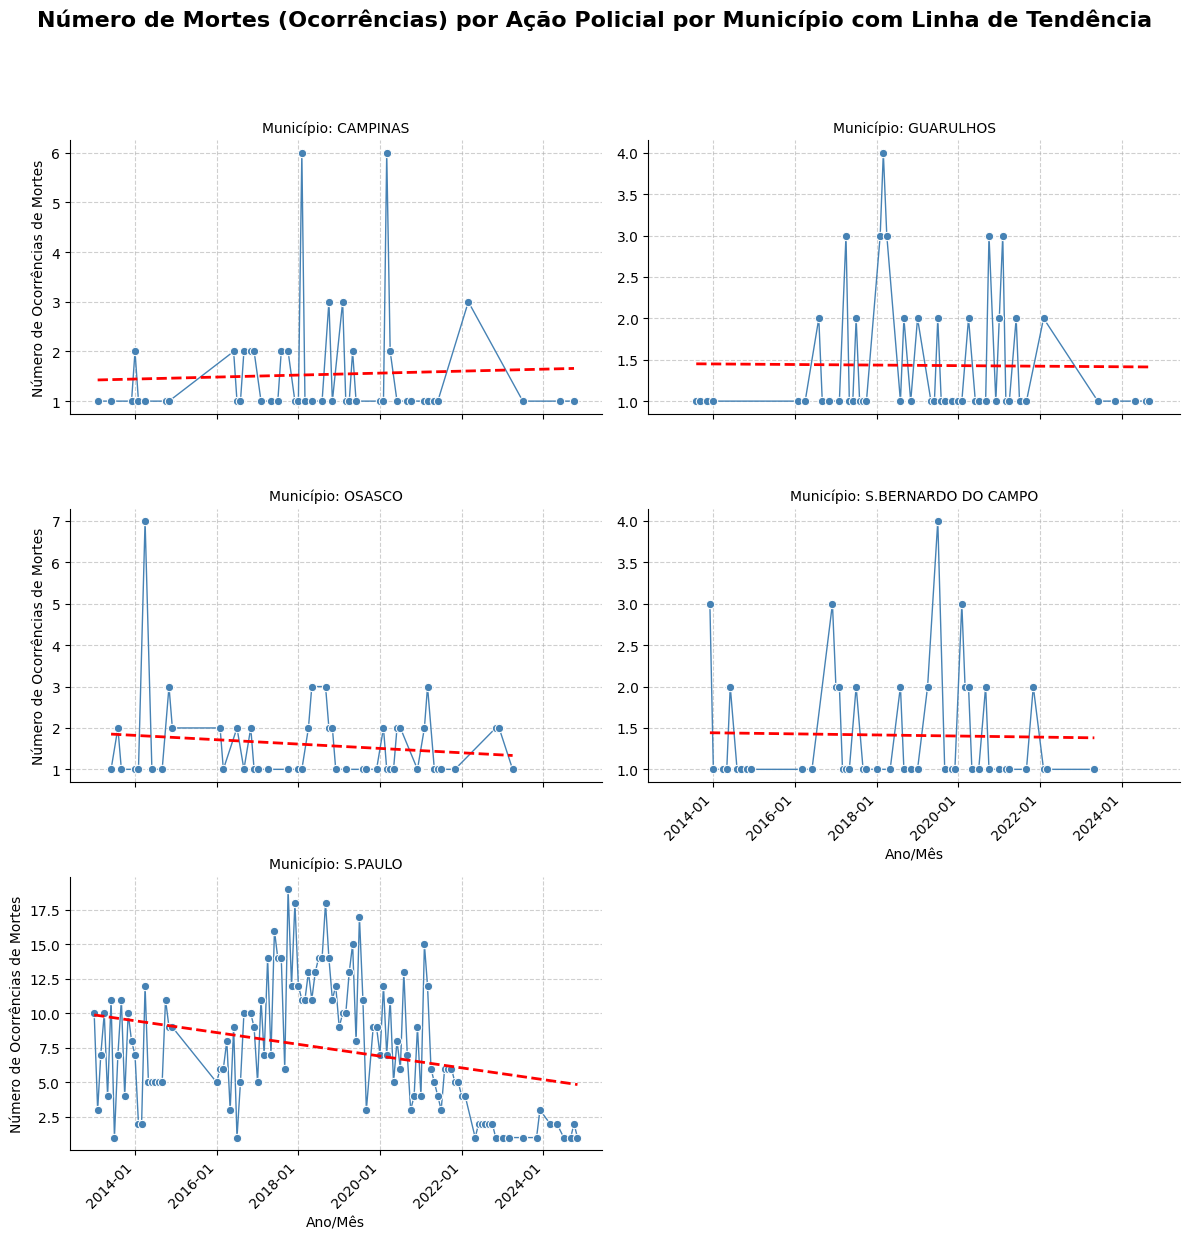

In [ ]:
import matplotlib.dates as mdates

# Converte a coluna 'ANO_MES'
df_top_5_mortes_temporal['ANO_MES_ORDINAL'] = df_top_5_mortes_temporal['ANO_MES'].apply(mdates.date2num)

g = sns.relplot(
    data=df_top_5_mortes_temporal,
    x='ANO_MES',
    y='NUMERO_DE_MORTES',
    col='MUNICIPIO_ELABORACAO',
    col_wrap=2,
    kind='line',
    height=4, aspect=1.5,
    marker='o',
    linewidth=1, # Linha mais fina para os dados brutos
    color='steelblue',
    palette='viridis',
    facet_kws={'sharey': False} # Permite eixo Y dinâmico
)

# Adicionar linha de tendência (regressão linear) - Convert ANO_MES to datetime for regplot
g.map_dataframe(sns.regplot,
                x='ANO_MES_ORDINAL',
                y='NUMERO_DE_MORTES',
                ci=None,
                scatter=False,
                color='red',
                line_kws={'linestyle': '--', 'linewidth': 2})

g.set_axis_labels("Ano/Mês", "Número de Ocorrências de Mortes")
g.set_titles("Município: {col_name}")

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(True, linestyle='--', alpha=0.6)

g.fig.suptitle('Número de Mortes (Ocorrências) por Ação Policial por Município com Linha de Tendência', fontsize=16, fontweight='bold', y=1.03)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()